In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy  as np

In [12]:
csv = "../merged_csv.csv"
df  = pd.read_csv(csv)

df.columns

Index(['Post Created Date', 'Post Created Time', 'Total Interactions', 'Likes',
       'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care',
       'Message', 'Link', 'Score', 'comment_csv', 'comment_neg', 'comment_pos',
       'comment_total', 'timestamp', 'week_day', 'time_slot', 'c_pos', 'c_neg',
       'r_pos', 'r_neg'],
      dtype='object')

(905, 15)


Text(0, 0.5, 'Score')

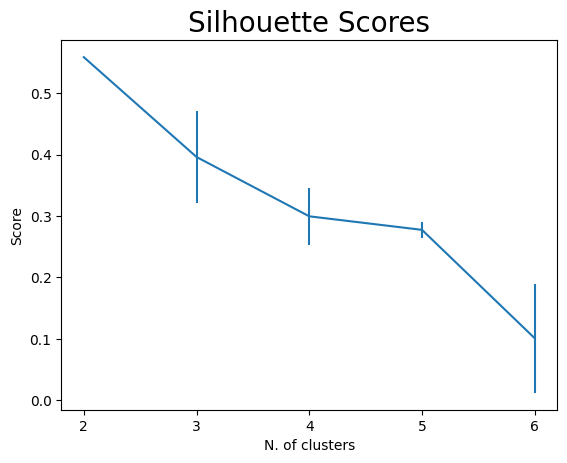

In [13]:
cols_del = [
    'Post Created Date',
    'Post Created Time',
    'Message',
    'Link',
    'timestamp',
    'comment_csv',
    'week_day',
    'time_slot',
    'comment_pos',
    'comment_neg',
    'comment_total',
]

X = df.drop(columns=cols_del)
print(X.shape)


def sel_best(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx = np.argsort(arr)[:X]
    return arr[dx]


n_clusters = range(2, 7)

sils = []
sils_err = []
n_iter = 20

for k in n_clusters:

    tmp_sil = []

    for _ in range(n_iter):
        gmm = GaussianMixture(n_components=k, reg_covar=0.01).fit(X)
        labels = gmm.predict(X)
        sil = silhouette_score(X, labels, metric='euclidean')
        tmp_sil.append(sil)

    val = np.mean(sel_best(np.array(tmp_sil), int(n_iter/5)))
    err = np.std(tmp_sil)

    sils.append(val)
    sils_err.append(err)

    df["class_gmm"] = -1
    for i, row in df.iterrows():
        df.at[i, "class_gmm"] = labels[i]

    df = df.sort_values(by=['class_gmm'], ascending=True)
    df.to_csv(f"merged_gmm_{k}.csv", index=False)


plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")